In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

### Load data

In [2]:
date = "Final_MNIST/2022-03-28_14-08-05_TL_2_classes"

data_file = f"../trainings/{date}.npz"
data = np.load(data_file)
for key, value in data.items():
    print(key, value.shape)
    
hp_file = f"../trainings/{date}.json"
with open(hp_file) as json_file:
    hp = json.load(json_file)

print("Max Accuracy", max(data["accuracys"][:, 1]))

try:
    print("Min DBI", min(data["dbis"][:, 1]))
except:
    pass
hp

accuracys (41, 2)
dbis (41, 2)
losses (2001,)
gradients (2001,)
params (5, 4, 2)
Max Accuracy 0.894
Min DBI 0.6287032607155446


{'dataset': 'mnist',
 'qubits': 4,
 'data_qubits': 4,
 'output_qubits': 2,
 'layers': 5,
 'train_size': 2500,
 'test_size': 500,
 'classes': [3, 6],
 'steps': 2000,
 'test_every': 50,
 'grads_every': 1,
 'start_stepsize': 0.005,
 'update_sz_every': 35000,
 'sz_factor': 0.1,
 'alpha': 1.0,
 'shots': None,
 'seed': 1337}

### Load data 2

In [3]:
date_2 = "Final_MNIST/2022-03-28_15-15-39_CE_2_classes"

data_file_2 = f"../trainings/{date_2}.npz"
data_2 = np.load(data_file_2)
for key, value in data_2.items():
    print(key, value.shape)
    
hp_file_2 = f"../trainings/{date_2}.json"
with open(hp_file_2) as json_file:
    hp_2 = json.load(json_file)

print("Max Accuracy", max(data_2["accuracys"][:, 1]))

try:
    print("Min DBI", min(data_2["dbis"][:, 1]))
except:
    pass

hp_2

accuracys (41, 2)
losses (2001,)
gradients (2001,)
params (5, 4, 2)
Max Accuracy 0.896


{'dataset': 'mnist',
 'qubits': 4,
 'data_qubits': 4,
 'output_qubits': 2,
 'layers': 5,
 'train_size': 2500,
 'test_size': 500,
 'classes': [3, 6],
 'steps': 2000,
 'test_every': 50,
 'grads_every': 1,
 'start_stepsize': 0.005,
 'update_sz_every': 35000,
 'sz_factor': 0.1,
 'alpha': 1.0,
 'shots': None,
 'seed': 1337}

### Smooth the loss with a sliding window

In [17]:
smoothed_losses = np.zeros(data["losses"].shape)
window_size = 150

for i in range(len(data["losses"])):
    if i < window_size/2:  
        smoothed_losses[i] = np.average(data["losses"][i:i+window_size])
    elif i < len(data["losses"]) - window_size/2:
        smoothed_losses[i] = np.average(data["losses"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_losses[i] = np.average(data["losses"][i-window_size:i])

In [18]:
smoothed_losses_2 = np.zeros(data_2["losses"].shape)
window_size = 150

for i in range(len(data_2["losses"])):
    if i < window_size/2:  
        smoothed_losses_2[i] = np.average(data_2["losses"][i:i+window_size])
    elif i < len(data_2["losses"]) - window_size/2:
        smoothed_losses_2[i] = np.average(data_2["losses"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_losses_2[i] = np.average(data_2["losses"][i-window_size:i])

### Smooth the gradients with a sliding window

In [6]:
smoothed_gradients = np.zeros(data["gradients"].shape)
window_size = 50

for i in range(len(data["gradients"])):
    if i < window_size/2:  
        smoothed_gradients[i] = np.average(data["gradients"][i:i+window_size])
    elif i < len(data["gradients"]) - window_size/2:
        smoothed_gradients[i] = np.average(data["gradients"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_gradients[i] = np.average(data["gradients"][i-window_size:i])

In [7]:
smoothed_gradients_2 = np.zeros(data_2["gradients"].shape)
window_size = 50

for i in range(len(data_2["gradients"])):
    if i < window_size/2:  
        smoothed_gradients_2[i] = np.average(data_2["gradients"][i:i+window_size])
    elif i < len(data_2["gradients"]) - window_size/2:
        smoothed_gradients_2[i] = np.average(data_2["gradients"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_gradients_2[i] = np.average(data_2["gradients"][i-window_size:i])

### Plot Training

In [8]:
title = f"Qubits: {hp['qubits']}, " + \
        f"Layers: {hp['layers']}, " + \
        f"Classes: {hp['classes']}, " + \
        f"Output_dim: {hp['output_qubits']}"

#### Accuracy

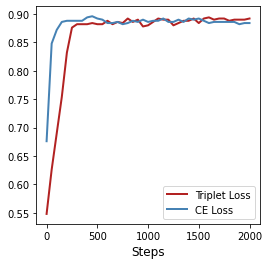

In [9]:
# Triplet
plt.figure(figsize=(4,4))

plt.plot(data["accuracys"][:, 0], data["accuracys"][:, 1], label="Triplet Loss", color="firebrick", linewidth=2)
plt.plot(data_2["accuracys"][:, 0], data_2["accuracys"][:, 1], label="CE Loss", color="steelblue", linewidth=2)

# plt.title("Accuracys", fontsize=12)
plt.legend()
plt.xlabel("Steps", fontsize=12)
plt.savefig("Accuracy.png", dpi=1000, bbox_inches='tight')
plt.show()

#### Loss

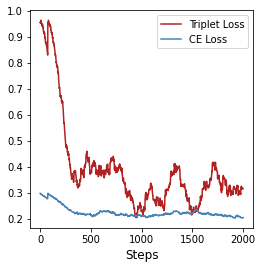

In [19]:
plt.figure(figsize=(4,4))

plt.plot(np.arange(len(smoothed_losses)), smoothed_losses, label="Triplet Loss", color="firebrick")
plt.plot(np.arange(len(smoothed_losses_2)), smoothed_losses_2, label="CE Loss", color="steelblue")

# plt.title("Loss", fontsize=12)

plt.legend()
plt.xlabel("Steps", fontsize=12)
plt.savefig("Loss.png", dpi=1000, bbox_inches='tight')
plt.show()

#### Gradients

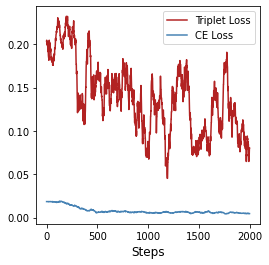

In [12]:
plt.figure(figsize=(4,4))

plt.plot(np.arange(len(smoothed_gradients)), smoothed_gradients, label="Triplet Loss", color="firebrick")
plt.plot(np.arange(len(smoothed_gradients_2)), smoothed_gradients_2, label="CE Loss", color="steelblue")


# plt.title("Gradients", fontsize=12)

plt.legend()
plt.xlabel("Steps", fontsize=12)
plt.savefig("Gradients.png", dpi=1000, bbox_inches='tight')
plt.show()

#### DBI

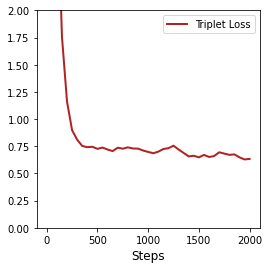

In [13]:
plt.figure(figsize=(4,4))

plt.plot(data["dbis"][:, 0], data["dbis"][:, 1], label="Triplet Loss", color="firebrick", linewidth=2)

# plt.title("DBI", fontsize=12)

plt.ylim(ymax = 2, ymin = 0)
plt.legend()
plt.xlabel("Steps", fontsize=12)
plt.savefig("DBI.png", dpi=1000, bbox_inches='tight')
plt.show()

### Plot Loss Buckets

In [ ]:
bucket_size = 50
n_buckets = data["gradients"].shape[0] // bucket_size
grad_buckets = np.array_split(data["gradients"][:n_buckets*bucket_size], n_buckets)

zeros = []

for b in grad_buckets:
    zeros.append((b == 0).sum()/50)

x = []
for i in range(0, (n_buckets)*bucket_size, bucket_size):
    x.append(i + bucket_size)  

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
ax2=ax1.twinx()

ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2

ax1.plot(np.arange(len(smoothed_losses)), smoothed_losses, label="Loss", color="darkorange", linewidth=3)
ax1.plot(np.arange(len(smoothed_gradients)), smoothed_gradients, label="Loss", color="red", linewidth=3)
ax1.set_ylabel("Loss", fontsize=20)
ax1.set_ylim([0, 1.1])
ax2.bar(x, zeros, color="mintcream", edgecolor="green", width=40, zorder=1)
ax2.set_ylabel("Percentage of Loss = 0", fontsize=20)
ax2.set_ylim([0, 1.1])
ax1.set_xlabel("Steps", fontsize=20)

plt.title("Training", fontsize=20)
plt.show()